<a href="https://colab.research.google.com/github/saitejachava2/SOH_NASA/blob/main/calculation_of_SOH_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import glob
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import math

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import model_from_json
from keras import optimizers

In [ ]:
dir = '/datasets'
listdir = os.listdir(dir)

print(listdir)
print("The number of dataset :", len(listdir))

['dd1.csv']
The number of dataset : 1


In [ ]:
num = ['dd1']
for i in range(len(listdir)):
    vector = np.zeros((1,2))
    path = os.path.join(os.getcwd(), '/datasets', num[i] + '.csv')
    csv = pd.read_csv(path)
    df = pd.DataFrame(csv)

    vec = df[['terminal_voltage', 'terminal_current', 'SOH']]

    globals()['data_{}'.format(num[i])] = vec

In [ ]:

data = pd.read_csv('/datasets/dd1.csv')
df = pd.DataFrame(data)
df

,time,terminal_voltage,terminal_current,SOH,A.sec,A.h,SOC,cycle,capacity,temperature
0,0.000,4.199360,-0.001866,0.945526,0.000000,0.000000,100.000000,1,1.891052,23.937044
1,16.781,4.199497,-0.002139,0.945526,-0.031312,-0.000009,99.999540,1,1.891052,23.924074
2,35.703,3.985606,-1.988778,0.945526,-0.071794,-0.000020,99.998945,1,1.891052,24.004257
3,53.781,3.963247,-1.992558,0.945526,-36.024925,-0.010007,99.470828,1,1.891052,24.162868
4,71.922,3.946647,-1.988491,0.945526,-72.171917,-0.020048,98.939862,1,1.891052,24.346368
...,...,...,...,...,...,...,...,...,...,...
100565,2781.312,3.579262,-0.001569,0.662540,-952197.282700,-264.499245,-19861.012100,168,1.325079,34.864823
100566,2791.062,3.581964,-0.003067,0.662540,-952197.298000,-264.499249,-19861.012420,168,1.325079,34.814770
100567,2800.828,3.584484,-0.003079,0.662540,-952197.327900,-264.499258,-19861.013050,168,1.325079,34.676258
100568,2810.640,3.587336,0.001219,0.662540,-952197.358200,-264.499266,-19861.013680,168,1.325079,34.565580


In [ ]:
data_dd1

,terminal_voltage,terminal_current,SOH
0,4.199360,-0.001866,0.945526
1,4.199497,-0.002139,0.945526
2,3.985606,-1.988778,0.945526
3,3.963247,-1.992558,0.945526
4,3.946647,-1.988491,0.945526
...,...,...,...
100565,3.579262,-0.001569,0.662540
100566,3.581964,-0.003067,0.662540
100567,3.584484,-0.003079,0.662540
100568,3.587336,0.001219,0.662540


In [ ]:
for i in range(len(listdir)):
    print("Shape of data :", np.shape(globals()['data_{}'.format(num[i])]))

Shape of data : (100570, 3)


In [ ]:
print(listdir)
dataset = data_dd1["terminal_voltage"]
output = data_dd1['SOH']


dataset = np.array(dataset)
dataset = dataset.reshape((len(dataset),1))
dataset.shape

['dd1.csv']


(100570, 1)

In [ ]:
train_size = int(len(dataset) * 0.7)
# train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

70399 30171


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

70398
30170


In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX.shape)
print(testX.shape)

(70398, 1, 1)
(30170, 1, 1)


In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2])))

model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')

In [ ]:
history = model.fit(trainX, trainY, epochs=20, batch_size=20, validation_data=(testX, testY), verbose=1, shuffle = False)

Epoch 1/20
3520/3520 [==============================] - 13s 3ms/step - loss: 0.3911 - val_loss: 0.0166
Epoch 2/20
3520/3520 [==============================] - 12s 3ms/step - loss: 0.0194 - val_loss: 0.0115
Epoch 3/20
3520/3520 [==============================] - 11s 3ms/step - loss: 0.0200 - val_loss: 0.0132
Epoch 4/20
3520/3520 [==============================] - 12s 3ms/step - loss: 0.0191 - val_loss: 0.0089
Epoch 5/20
3520/3520 [==============================] - 11s 3ms/step - loss: 0.0185 - val_loss: 0.0119
Epoch 6/20
3520/3520 [==============================] - 11s 3ms/step - loss: 0.0181 - val_loss: 0.0099
Epoch 7/20
3520/3520 [==============================] - 11s 3ms/step - loss: 0.0184 - val_loss: 0.0110
Epoch 8/20
3520/3520 [==============================] - 12s 3ms/step - loss: 0.0178 - val_loss: 0.0098
Epoch 9/20
3520/3520 [==============================] - 10s 3ms/step - loss: 0.0174 - val_loss: 0.0111
Epoch 10/20
3520/3520 [==============================] - 12s 3ms/step - l

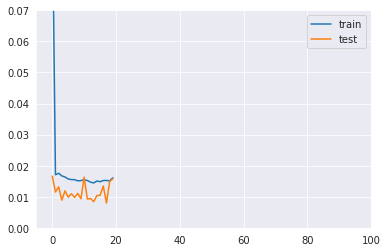

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.axis([-5, 100, 0, 0.07])
plt.legend()
plt.show()

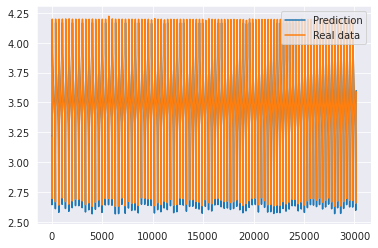

In [ ]:
yhat = model.predict(testX)
tyhat = model.predict(trainX)
plt.plot(yhat, label='Prediction')
plt.plot(testY, label='Real data')
plt.legend()
plt.show()

In [ ]:
print("Shape of train data :", trainX.shape)
print("Shape of prediction :", yhat.shape)
print("Shape of real data :", testY.shape)

Shape of train data : (70398, 1, 1)
Shape of prediction : (30170, 1)
Shape of real data : (30170,)


In [ ]:
rmse = math.sqrt(mean_squared_error(testY, yhat))
mae = mean_absolute_error(testY, yhat)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.045
Test MAE: 0.016


In [ ]:
print("Shape of cycle :", np.shape(output))

cycle1 = output[0:train_size-1]
cycle2 = output[train_size+1:len(dataset)]

# cycle1 = cycle[0:train_size]
# cycle2 = cycle[train_size:len(dataset)]

print(np.shape(cycle1), np.shape(cycle2))

Shape of cycle : (100570,)
(70398,) (30170,)


IndexError: ignored

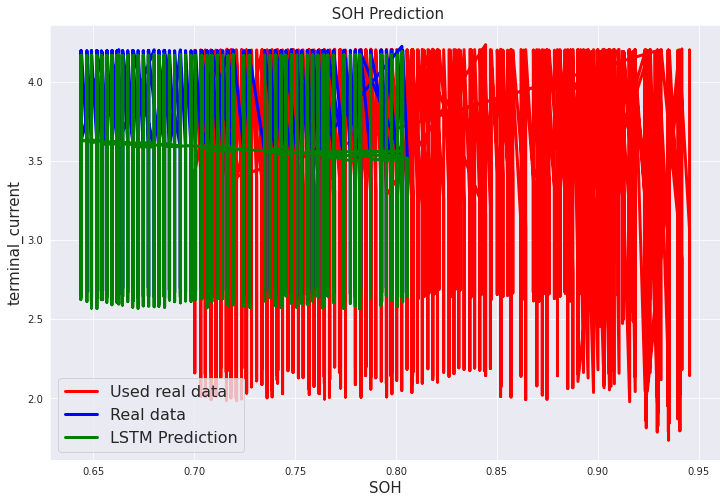

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

plt.plot(cycle1, trainX[:,0],label='Used real data', linewidth = 3, color='r')
plt.plot(cycle2, testY,label='Real data', linewidth = 3, color='b')
# plt.plot(cycle2, yhat[:,0],label='LSTM Prediction', linewidth = 3, color='g')
plt.plot(cycle2, yhat[:,0],label='LSTM Prediction', linewidth = 3, color='g')
plt.legend(prop={'size': 16})

plt.ylabel('terminal_current', fontsize = 15)
plt.xlabel('SOH', fontsize = 15)
plt.title( " SOH Prediction", fontsize = 15)
plt.savefig('50%/fig/' + str(num[7]) + '_LSTM.jpg')
plt.show()